In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
from KDEpy import NaiveKDE
from probability import *
from transforms import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
import matplotlib
matplotlib.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


### Plot $\mathcal{B}_\mathbb{R}$ map between $(\lambda, c_0=1, c_1=1)$ and $(\mu, \zeta_0=0, \zeta_1=0)$

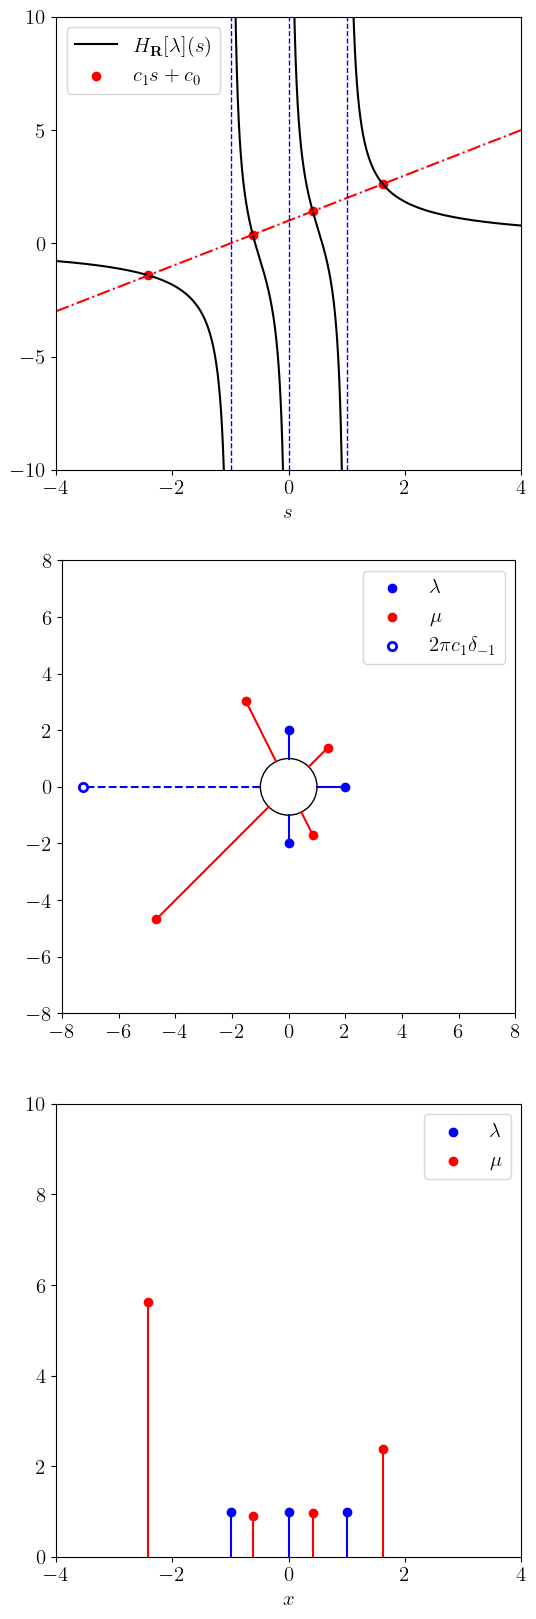

In [2]:
x = np.linspace(-4, 4, 10000)

N = 3
a = np.array([-1, 0, 1])
b = np.ones(N)

c1 = 1
c0 = 1

xi0, xi1, alpha, beta = B_R_discrete(c0, c1, a, b)

Hf = np.sum(b[None, :]/(x[:, None] - a[None, :]), axis=1)
Hf[np.where(np.diff(Hf) > 0)] = np.nan

M = N-1 + (c0 != 0) + (c1 > 0)

fig, axs = plt.subplots(3, 1, figsize=(6, 20))
axs[0].plot(x, Hf, color="k", label="$H_{\mathbf{R}}[\lambda](s)$")
axs[0].plot(x, c1*x+c0, color="red", linestyle="dashdot")
axs[0].scatter(alpha, c1*alpha+c0, color="red", label="$c_1s + c_0$")
axs[0].vlines(a, -10, 10, color="blue", linestyle="dashed", linewidth=1)
axs[0].set_xlabel("$s$")
axs[0].set_xticks(np.arange(-4, 5, 2))
axs[0].set_yticks(np.arange(-10, 11, 5))
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-10, 10)
axs[0].legend()
#axs[0].set_aspect(1/3)

theta = mobius_inv(a)
phi = mobius_inv(alpha)

width = 8
scale = 1

circle = plt.Circle((0, 0), 1, color='black', fill=False)
axs[1].scatter((scale*b+1)*np.cos(theta), (scale*b+1)*np.sin(theta), zorder=10, color="blue", label="$\lambda$")
axs[1].scatter((scale*beta+1)*np.cos(phi), (scale*beta+1)*np.sin(phi), zorder=10, color="red", label="$\mu$")
for i in range(N):
    axs[1].plot(np.array([1, scale*b[i]+1])*np.cos(theta[i]), np.array([1, scale*b[i]+1])*np.sin(theta[i]), color="blue")
if c1 > 0:
    axs[1].scatter(-scale*2*np.pi*c1-1, 0, facecolors='white', edgecolors='blue', linewidth=2, zorder=10, label="$2\pi c_1\delta_{-1}$")
    axs[1].plot(np.array([-1, -scale*2*np.pi*c1-1]), [0, 0], color="blue", linestyle="--")
for i in range(len(beta)):
    axs[1].plot(np.array([1, scale*beta[i]+1])*np.cos(phi[i]), np.array([1, scale*beta[i]+1])*np.sin(phi[i]), color="red")
axs[1].add_patch(circle)
axs[1].set_xticks(np.arange(-width, width+1, 2))
axs[1].set_yticks(np.arange(-width, width+1, 2))
axs[1].set_xlim(-width, width)
axs[1].set_ylim(-width, width)
axs[1].set_aspect('equal')
axs[1].legend()

axs[2].scatter(a, b, color="blue", label="$\lambda$")
axs[2].vlines(a, 0, b, color="blue")
axs[2].scatter(alpha, beta, color="red", label="$\mu$")
axs[2].vlines(alpha, 0, beta, color="red")
axs[2].set_xlabel("$x$")
axs[2].set_xticks(np.arange(-4, 5, 2))
axs[2].set_yticks(np.arange(-10, 11, 2))
axs[2].set_xlim(-4, 4)
axs[2].set_ylim(0, 10)
axs[2].legend()

#plt.savefig("fig.pdf")
plt.show()

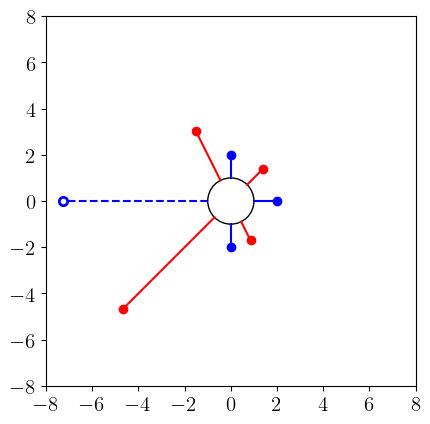

In [3]:
theta = mobius_inv(a)
phi = mobius_inv(alpha)

width = 8
scale = 1

fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.scatter((scale*b+1)*np.cos(theta), (scale*b+1)*np.sin(theta), zorder=10, color="blue")
ax.scatter((scale*beta+1)*np.cos(phi), (scale*beta+1)*np.sin(phi), zorder=10, color="red")
for i in range(N):
    ax.plot(np.array([1, scale*b[i]+1])*np.cos(theta[i]), np.array([1, scale*b[i]+1])*np.sin(theta[i]), color="blue")
ax.scatter(-scale*2*np.pi*c1-1, 0, facecolors='white', edgecolors='blue', linewidth=2, zorder=10)
if c1 > 0:
    ax.plot(np.array([-1, -scale*2*np.pi*c1-1]), [0, 0], color="blue", linestyle="--")
for i in range(len(beta)):
    ax.plot(np.array([1, scale*beta[i]+1])*np.cos(phi[i]), np.array([1, scale*beta[i]+1])*np.sin(phi[i]), color="red")
ax.add_patch(circle)
ax.set_xticks(np.arange(-width, width+1, 2))
ax.set_yticks(np.arange(-width, width+1, 2))
ax.set_xlim(-width, width)
ax.set_ylim(-width, width)
ax.set_aspect('equal')
plt.show()

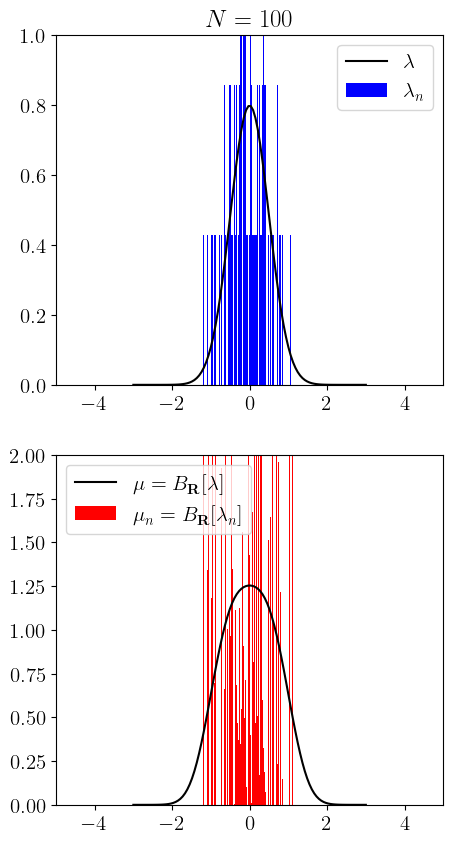

In [4]:
N = 100
lower = -3
upper = 3
mu = 0
sigma = 1/2
X = scipy.stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
a = X.rvs(N)
b = np.ones(N)/N

x = np.linspace(lower, upper, 100)
dx = x[1] - x[0]
f = np.exp(-(x - mu)**2/(2*sigma**2))
f /= np.sum(f) * dx

c0 = 0
c1 = 0

xi0, xi1, alpha, beta = B_R_discrete(c0, c1, a, b)

Hf = hilbert_transform(f, x, dx)


bins = 100

fig, axs = plt.subplots(2, 1, figsize=(5, 10))

hist, bin_edges = np.histogram(a, weights=b, bins=bins)
axs[0].bar(x=bin_edges[:-1], height=hist/np.diff(bin_edges), width=np.diff(bin_edges), color="blue", align='edge', label="$\lambda_n$")
axs[0].plot(x, f, color="k", label="$\lambda$")
axs[0].set_xlim(lower-2, upper+2)
axs[0].set_ylim(0, 1)
axs[0].legend()
axs[0].set_title(f"$N = {N}$")

hist, bin_edges = np.histogram(alpha, weights=beta, bins=bins)
axs[1].bar(x=bin_edges[:-1], height=hist/np.diff(bin_edges), width=np.diff(bin_edges), color="red", align='edge', label="$\mu_n = B_{\mathbf{R}}[\lambda_n]$")
axs[1].plot(x, f/(f**2+(Hf-c1*x-c0)**2), color="k", label="$\mu = B_{\mathbf{R}}[\lambda]$")
axs[1].set_xlim(lower-2, upper+2)
axs[1].set_ylim(0, 2)
axs[1].legend()

plt.show()